In [1]:
import  pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cars.csv")
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [54]:
df["owner"].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [3]:
df.shape

(8128, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


In [5]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [6]:
df.describe()

,km_driven,selling_price
count,8.128000e+03,8.128000e+03
mean,6.981951e+04,6.382718e+05
std,5.655055e+04,8.062534e+05
min,1.000000e+00,2.999900e+04
25%,3.500000e+04,2.549990e+05
50%,6.000000e+04,4.500000e+05
75%,9.800000e+04,6.750000e+05
max,2.360457e+06,1.000000e+07


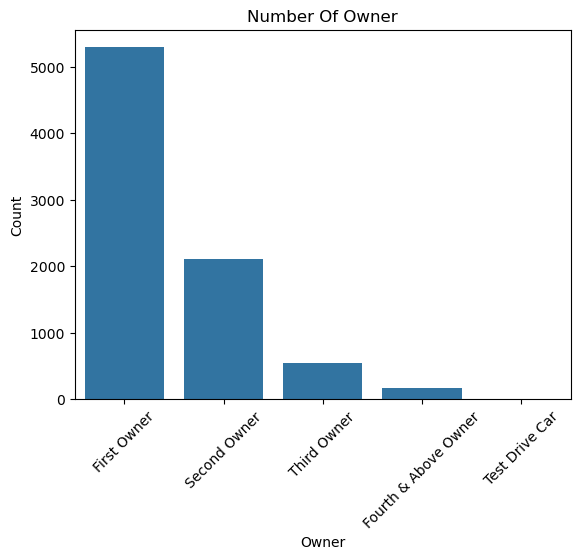

In [7]:
sns.countplot(x='owner', data=df)
plt.title("Number Of Owner")
plt.xlabel("Owner")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Fuel System')

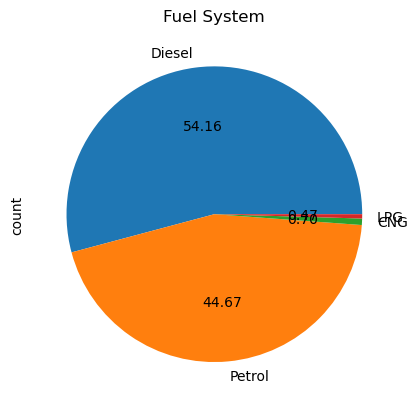

In [8]:
df["fuel"].value_counts().plot(kind="pie",autopct="%.2f")
plt.title("Fuel System")

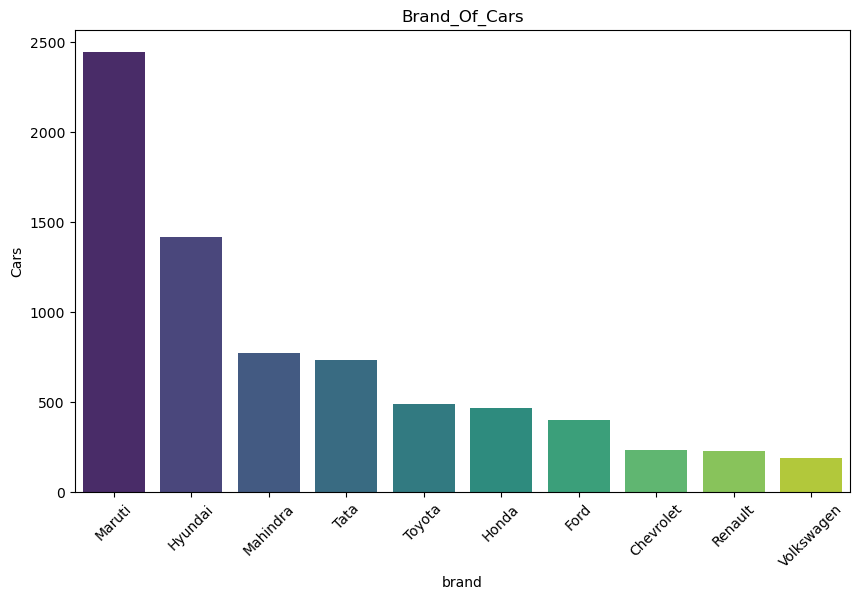

In [9]:
values = df["brand"].value_counts().iloc[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=values.index, y=values.values, hue=values.index, dodge=False, palette="viridis", legend=False)
plt.xlabel("brand")
plt.ylabel("Cars")
plt.title("Brand_Of_Cars")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='selling_price', ylabel='km_driven'>

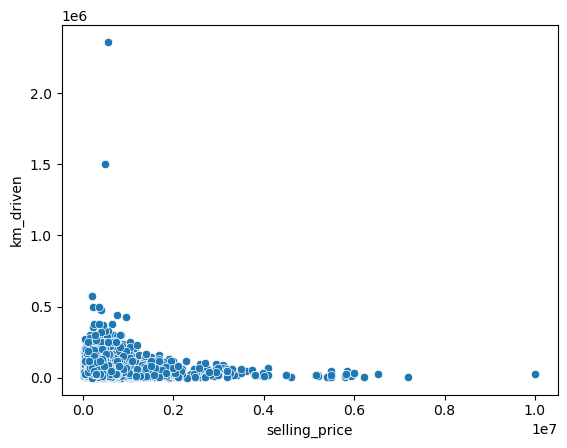

In [10]:
sns.scatterplot(x='selling_price',y='km_driven',data=df)

In [11]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


<Axes: xlabel='selling_price', ylabel='owner'>

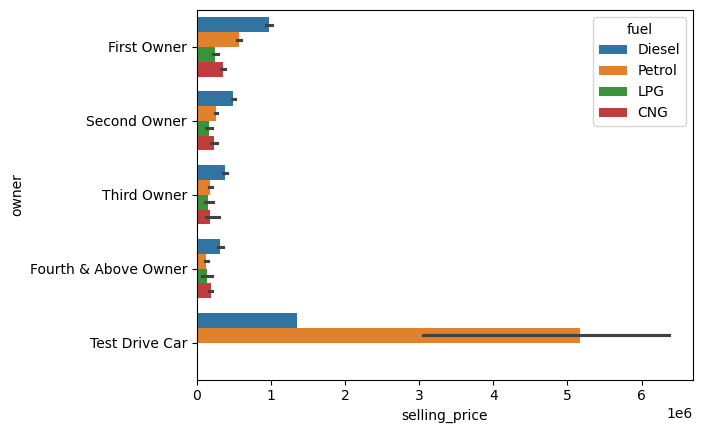

In [12]:
sns.barplot(y="owner",x="selling_price",hue="fuel",data=df)

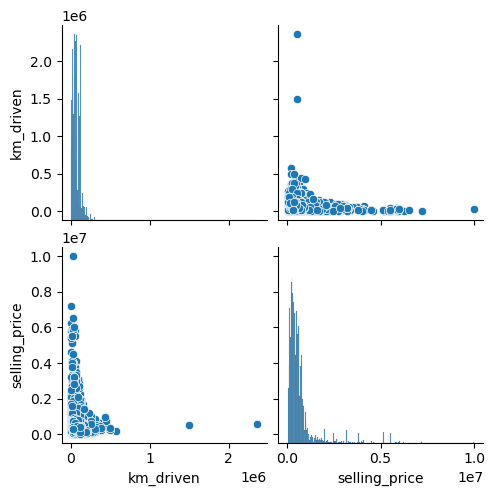

In [13]:
sns.pairplot(df)

In [94]:
df_encoded = pd.get_dummies(df, columns=['brand', 'fuel', 'owner'], drop_first=True)

In [96]:
X = df_encoded.drop('selling_price', axis=1)
y = df_encoded['selling_price']

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
x_train.shape,x_test.shape

((5689, 4), (2439, 4))

In [102]:
from sklearn.linear_model import LinearRegression

In [104]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [106]:
y_pred = model.predict(X_test)

In [108]:
from sklearn.metrics import r2_score

In [110]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.3f}")

R² Score: 0.778
